# Archivos Fits usando AstroPy, imagen RGB

- Flexible Image Transport System.
- Almacena datos como espectros, listas, cubos de datos.
- Cada archivo contiene una cabecera o header que describe los datos.
- Soporta datos multidimensionales e información compleja.

https://dr12.sdss.org/fields/

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from astropy.io import fits

Ahora podemos cargar el archivo FITS. Utilizaremos el archivo de M42 FITS, utilizando la función open(), seguido de la dirección de nuestro archivo.

In [3]:
M42 = fits.open('frame-u-006073-4-0063.fits')

In [4]:
M42

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001C5EC7CA970>, <astropy.io.fits.hdu.image.ImageHDU object at 0x000001C5EC7EE160>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001C5EC7EE2B0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001C5EC7EE3A0>]

In [5]:
M42.info()

Filename: frame-u-006073-4-0063.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      96   (2048, 1489)   float32   
  1                1 ImageHDU         6   (2048,)   float32   
  2                1 BinTableHDU     27   1R x 3C   [49152E, 2048E, 1489E]   
  3                1 BinTableHDU     79   1R x 31C   [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   


La información de la imagen está ubicada en el bloque `PRIMARY`. Podemos ver que la imagen contiene 2 HDU (Header Data Unit). Un HDU es un componente de alto nivel de los archivos FITS, que contienen datos y metadatos de un header asociado.

![image](http://www.stsci.edu/instruments/wfpc2/Wfpc2_dhb/images/intro_ch2a.gif)

In [6]:
M42[0]

In [7]:
M42[0].header

SIMPLE  =                    T /                                                
BITPIX  =                  -32 / 32 bit floating point                          
NAXIS   =                    2                                                  
NAXIS1  =                 2048                                                  
NAXIS2  =                 1489                                                  
EXTEND  =                    T /Extensions may be present                       
BZERO   =              0.00000 /Set by MRD_SCALE                                
BSCALE  =              1.00000 /Set by MRD_SCALE                                
TAI     =        4649973257.37 / 1st row Number of seconds since Nov 17 1858    
RA      =            83.820000 / 1st row RA of telescope boresight (deg)        
DEC     =           -5.349071  / 1st row Dec of telescope boresight (degrees)   
SPA     =             180.000  / 1st row Cam col position angle wrt N (deg)     
IPA     =             137.18

In [8]:
M42[1].header

XTENSION= 'IMAGE   '           /Image Extension created by MWRFITS v1.11        
BITPIX  =                  -32 /                                                
NAXIS   =                    1 /                                                
NAXIS1  =                 2048 /                                                
PCOUNT  =                    0 /                                                
GCOUNT  =                    1 /                                                

In [9]:
data = M42[0].data

In [10]:
type(data)

numpy.ndarray

Nuestra data es un 2D numpy array. 

In [11]:
data.shape

(1489, 2048)

In [12]:
data.dtype.name


'float32'

In [13]:
print('Min:', np.min(data))
print('Max:', np.max(data))
print('Mean:', np.mean(data))
print('Stdev:', np.std(data))

Min: -0.34472656
Max: 552.0
Mean: 5.3398747
Stdev: 15.16415


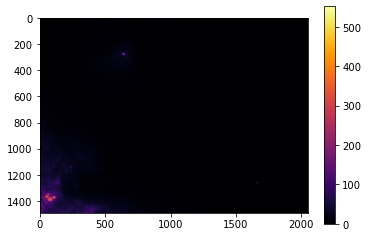

In [15]:
plt.imshow(data, cmap='inferno')
plt.colorbar()

http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps

Plotting histogram

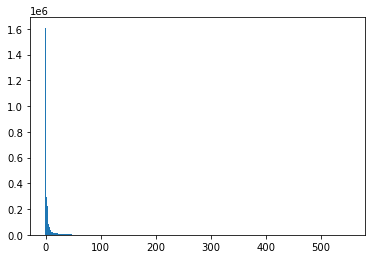

In [16]:
histogram = plt.hist(data.flat, bins=500)

[Text(1, 4000.0, '5,000'),
 Text(1, 10000.0, '10,000'),
 Text(1, 20000.0, '20,000')]

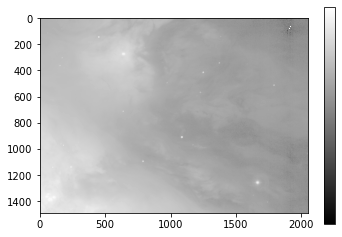

In [17]:
from matplotlib.colors import LogNorm


plt.imshow(data, cmap='gray', norm=LogNorm())
cbar = plt.colorbar(ticks=[4.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])


In [18]:
M42u = fits.open('frame-u-006073-4-0063.fits')
M42i = fits.open('frame-i-006073-4-0063.fits')
M42g = fits.open('frame-g-006073-4-0063.fits')

In [19]:
from astropy.visualization import make_lupton_rgb

In [20]:
g = M42g[0].data
i = M42i[0].data
u = M42u[0].data

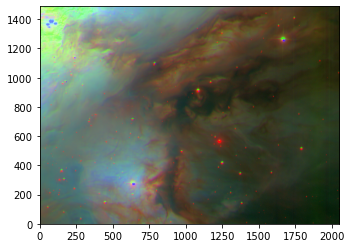

In [21]:

rgb_default = make_lupton_rgb(i,g, u,stretch=1.5,Q=10)



plt.imshow(rgb_default, origin='lower')
plt.savefig("rgbM42.jpg")

## Ejercicio FITS

### Units and Coordinates

In [22]:
from astropy import units as u
from astropy.coordinates import SkyCoord

![asddsad](https://skyandtelescope.org/wp-content/uploads/RA-Dec-wiki-Tom-RuenCC-BY-SA-3.0.jpg)

In [23]:
c = SkyCoord(ra=10.625*u.degree, dec=41.2*u.degree)
c = SkyCoord(10.625, 41.2, unit='deg')
c = SkyCoord('00h42m30s', '+41d12m00s')
c = SkyCoord('00h42.5m', '+41d12m')
c = SkyCoord('00 42 30 +41 12 00', unit=(u.hourangle, u.deg))
c = SkyCoord('00:42.5 +41:12', unit=(u.hourangle, u.deg))
c

<SkyCoord (ICRS): (ra, dec) in deg
    (10.625, 41.2)>

In [24]:
c.ra

<Longitude 10.625 deg>

In [25]:
c.ra.hour

0.7083333333333335

In [26]:
c.dec

<Latitude 41.2 deg>

In [27]:
c.dec.radian

0.7190756518216638